In [1]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adagrad
import matplotlib.pyplot as plt

In [2]:
# Import the pkl file.
with open('ai_image_classifier_small_one_aug_img.pkl', 'rb') as file:
    recalled_imgs = pickle.load(file)

type(recalled_imgs)

dict

In [3]:
# Set train, test variables.
X_train = recalled_imgs['X_train']
X_test = recalled_imgs['X_test']
y_train = recalled_imgs['y_train']
y_test = recalled_imgs['y_test']

In [4]:
# Convert values to numpy arrays
X_train_aug_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_aug_np = np.array(y_train) 
y_test_np = np.array(y_test)

# Load and preprocess your CMU Face Images dataset (Ensure each image is labeled as "with sunglasses" or "without sunglasses")
# The following code assumes that you have already loaded and preprocessed your dataset into 'X' and 'y' (features and labels).

# Split the training dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_aug_np, y_train_aug_np, test_size=0.2, random_state=42)


In [9]:
# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.01, seed=123),
    layers.Flatten(),
    layers.Dense(99, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary class
])

# Compile the model
model.compile(optimizer=Adagrad(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 48
epochs = 16
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

Epoch 1/16
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 0.7332 - loss: 0.5283 - val_accuracy: 0.6203 - val_loss: 0.6136
Epoch 2/16
160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.8499 - loss: 0.3429 - val_accuracy: 0.8133 - val_loss: 0.4920
Epoch 3/16
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.8567 - loss: 0.3360 - val_accuracy: 0.8547 - val_loss: 0.3722
Epoch 4/16
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 105ms/step - accuracy: 0.8617 - loss: 0.3211 - val_accuracy: 0.8758 - val_loss: 0.3036
Epoch 5/16
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.8911 - loss: 0.2698 - val_accuracy: 0.8813 - val_loss: 0.2832
Epoch 6/16
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.8867 - loss: 0.2695 - val_accuracy: 0.8789 - val_loss: 0.2862
Epoch 7/16
160/160 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.8962 - loss: 0.2490 - val_accuracy: 0.8750 - val_loss: 0.2807
Epoch 8/16
160/160 ━━━━━━━━━━━━━━━━━━━━ 22s 139ms/step - accuracy: 0.9076 - loss: 0

In [10]:
# Evaluate the model using test data.
test = model.evaluate(X_test, y_test)
test[1]

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8902 - loss: 0.3160


0.8799999952316284

160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.9745 - loss: 0.0888


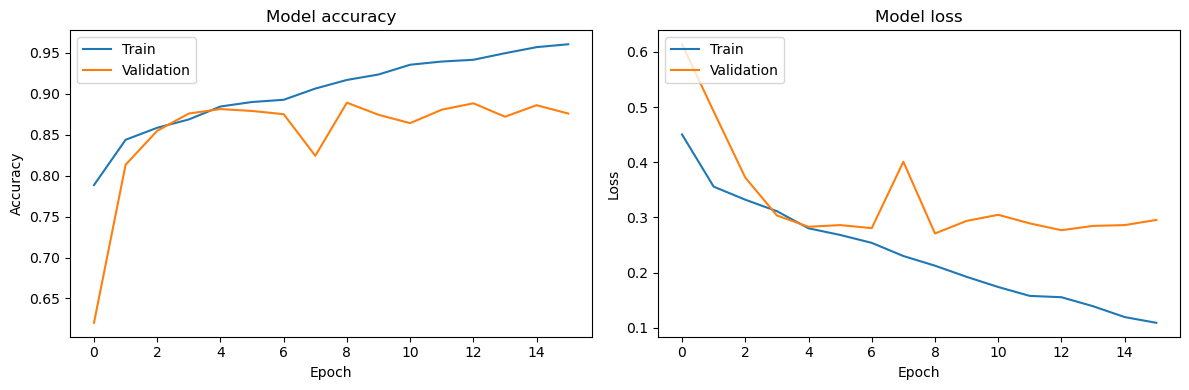

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show(
model.fit(X_train, y_train))

In [ ]:
# Looks like the model performs better around 10 epochs. Let's recompile there.
# Define a CNN model
model = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.01, seed=123),
    layers.Flatten(),
    layers.Dense(99, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary class
])

# Compile the model
model.compile(optimizer=Adagrad(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 48
epochs = 8
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs
)

Epoch 1/6
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 117ms/step - accuracy: 0.7275 - loss: 0.5277 - val_accuracy: 0.6883 - val_loss: 0.6016
Epoch 2/6
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.8347 - loss: 0.3592 - val_accuracy: 0.7867 - val_loss: 0.5049
Epoch 3/6
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8667 - loss: 0.3249 - val_accuracy: 0.8359 - val_loss: 0.4057
Epoch 4/6
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8729 - loss: 0.3026 - val_accuracy: 0.8172 - val_loss: 0.3771
Epoch 5/6
160/160 ━━━━━━━━━━━━━━━━━━━━ 18s 110ms/step - accuracy: 0.8806 - loss: 0.2777 - val_accuracy: 0.8664 - val_loss: 0.3152
Epoch 6/6
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.8892 - loss: 0.2630 - val_accuracy: 0.8742 - val_loss: 0.3022


In [13]:
# reevaluate the model using test data.
test = model.evaluate(X_test, y_test)
test[1]

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8423 - loss: 0.3543


0.8462499976158142

In [15]:
# Save the model
model.save('model.keras')